#SVM & Naive Bayes Theoretical Questions

####**1. What is a Support Vector Machine (SVM) ?**

**Answer:**
A **Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm primarily used for classification, though it can also be applied to regression tasks. It aims to find the **optimal hyperplane** that best separates data into distinct classes. In two-dimensional space, this hyperplane is simply a line, but in higher dimensions, it becomes a hyperplane.

SVM chooses the hyperplane that **maximizes the margin**, i.e., the distance between the hyperplane and the nearest data points from each class. These critical data points are called **support vectors** — they are the most influential elements in determining the decision boundary.

Mathematically, for a binary classification problem:

$$
f(x) = \text{sign}(w^T x + b)
$$

Where $w$ is the weight vector, and $b$ is the bias term. The goal is to maximize the margin $\frac{2}{\|w\|}$ subject to constraints that all data points are correctly classified.

SVMs can be extended to handle non-linearly separable data using **kernel functions**, which map input data into higher-dimensional spaces.

---

####**2. What is the difference between Hard Margin and Soft Margin SVM ?**

**Answer:**
The main difference lies in how strictly the algorithm separates the classes:

* **Hard Margin SVM** assumes data is perfectly linearly separable. It finds a hyperplane that separates the data without any misclassifications. However, it is **sensitive to outliers and noise**, which may make it unsuitable for real-world datasets.

* **Soft Margin SVM**, on the other hand, introduces **slack variables** ($\xi$) to allow for some misclassifications. It optimizes a trade-off between maximizing the margin and minimizing classification errors. This is controlled by the **regularization parameter $C$**.

The objective function for soft margin SVM becomes:

$$
\min \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
y_i(w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Thus, soft margin SVM is more **flexible and robust** in practice.

---

####**3. What is the mathematical intuition behind SVM ?**

**Answer:**
SVM aims to **maximize the margin** between classes by finding the optimal separating hyperplane. The intuition is that a larger margin leads to better generalization on unseen data.

Given a set of training samples $\{(x_i, y_i)\}$ with $y_i \in \{-1, +1\}$, SVM solves the following optimization problem:

$$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

subject to:

$$
y_i(w^T x_i + b) \geq 1
$$

This is a convex quadratic programming problem, ensuring a global optimum. The solution is obtained by only considering the **support vectors** — points lying closest to the decision boundary. These support vectors determine the position and orientation of the hyperplane.

When data is not linearly separable, SVM introduces slack variables and uses kernel functions to handle non-linear cases.

---

####**4. What is the role of Lagrange Multipliers in SVM ?**

**Answer:**
Lagrange multipliers are used in SVM to convert the constrained optimization problem into a dual form, which is easier to solve and allows the use of kernels.

For the primal problem:

$$
\min_{w, b} \frac{1}{2} \|w\|^2 \quad \text{subject to } y_i(w^T x_i + b) \geq 1
$$

We construct the Lagrangian:

$$
L(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{n} \alpha_i [y_i(w^T x_i + b) - 1]
$$

Solving the dual allows us to express the solution in terms of dot products $x_i^T x_j$, which leads to the **kernel trick**. The dual form depends only on support vectors (where $\alpha_i > 0$) and allows us to deal with non-linear data efficiently.

---

####**5. What are Support Vectors in SVM ?**

**Answer:**
**Support vectors** are the data points that lie **closest to the decision boundary** (i.e., the hyperplane). These points are critical because:

* They determine the **position and orientation** of the hyperplane.
* Removing a support vector would change the decision boundary.
* They are the only points with **non-zero Lagrange multipliers** in the dual formulation.

In soft margin SVM, support vectors can lie on the margin, inside the margin, or even be misclassified (if the slack variable $\xi_i > 0$).

Hence, support vectors are the most **informative data points** in the training set.

---

####**6. What is a Support Vector Classifier (SVC) ?**

**Answer:**
A **Support Vector Classifier (SVC)** is the implementation of SVM for **classification** problems. It constructs a hyperplane that maximally separates different classes by leveraging support vectors.

In scikit-learn, SVC is the class that performs SVM classification. It supports various kernels such as:

* **linear** (for linearly separable data)
* **poly** (polynomial kernel)
* **rbf** (Radial Basis Function kernel)
* **sigmoid**

SVC can handle both binary and multiclass classification (via One-vs-One strategy) and provides options to tune **C** (regularization) and **gamma** (kernel coefficient) for performance.

---

####**7. What is a Support Vector Regressor (SVR) ?**

**Answer:**
**Support Vector Regressor (SVR)** is the regression counterpart of SVC. Instead of classifying data, it predicts continuous values.

SVR attempts to fit the best line (or curve in case of non-linear kernels) such that the **maximum number of data points fall within a margin $\epsilon$** from the predicted line, with minimum model complexity.

Its optimization problem involves:

* Minimizing the model complexity $\|w\|^2$
* Allowing some deviations from the margin controlled by a parameter $\epsilon$
* Using slack variables and the $C$ parameter to manage error tolerance

SVR can also be extended with kernels to handle non-linear regression problems.

---

####**8. What is the Kernel Trick in SVM ?**

**Answer:**
The **kernel trick** allows SVM to handle **non-linearly separable data** by implicitly mapping the input features into a higher-dimensional space where a linear separator may exist.

Instead of computing the mapping $\phi(x)$ explicitly, the kernel trick uses a **kernel function** $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$, which computes the inner product in the transformed space directly.

Common kernel functions:

* **Linear:** $K(x, y) = x^T y$
* **Polynomial:** $K(x, y) = (x^T y + c)^d$
* **RBF (Gaussian):** $K(x, y) = \exp(-\gamma \|x - y\|^2)$

The kernel trick allows SVM to perform complex classification without the computational cost of transforming all data.

---

####**9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.**

**Answer:**

| Kernel         | Definition                            | Use Case                          | Pros                          | Cons                                   |
| -------------- | ------------------------------------- | --------------------------------- | ----------------------------- | -------------------------------------- |
| **Linear**     | $K(x, y) = x^T y$                     | Linearly separable data           | Fast, interpretable           | Limited to linear problems             |
| **Polynomial** | $K(x, y) = (x^T y + c)^d$             | Complex but still structured data | Captures feature interactions | More complex, prone to overfitting     |
| **RBF**        | $K(x, y) = \exp(-\gamma \|x - y\|^2)$ | Non-linear, complex data          | Very flexible                 | Needs tuning (γ), less interpretable |

The choice depends on data complexity and the trade-off between interpretability and performance.

---

####**10. What is the effect of the C parameter in SVM ?**

**Answer:**
The **C parameter** in SVM controls the **trade-off between maximizing the margin and minimizing the classification error**.

* A **large C** tries to classify all training examples correctly by allowing less margin and penalizing misclassifications heavily. This can lead to **overfitting**.
* A **small C** allows for a wider margin and more misclassifications, which may help **generalization** and reduce overfitting.

Thus, C acts as a **regularization parameter**, and tuning it is crucial for model performance.

---Continuing from the previous response, here are the detailed answers to **questions 11–20** from your assignment:

---

####**11. What is the role of the Gamma parameter in RBF Kernel SVM ?**

**Answer:**
In SVM with an **RBF (Radial Basis Function) kernel**, the **`gamma`** parameter defines **how far the influence of a single training example reaches**. It controls the shape of the decision boundary:

* **High gamma** (e.g., 10): Each point’s influence is very localized. The model tries to fit the training data closely, which can lead to **overfitting**.
* **Low gamma** (e.g., 0.01): Points have a wider influence. The decision boundary becomes smoother and may **underfit**.

Mathematically, the RBF kernel is:

$$
K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
$$

Thus, tuning gamma is essential. It should be optimized using methods like **GridSearchCV** to find a good balance between bias and variance.

---

####**12. What is the Naïve Bayes classifier, and why is it called "Naïve" ?**

**Answer:**
The **Naïve Bayes classifier** is a **probabilistic** machine learning algorithm based on **Bayes’ Theorem**, used primarily for classification tasks. It assumes that all features are **independent given the class label**, which is a strong and often unrealistic assumption — hence the term **“naïve.”**

Despite this assumption, Naïve Bayes performs well in many real-world tasks, especially in **text classification**, spam detection, and sentiment analysis.

The classifier computes:

$$
P(y \mid x_1, x_2, ..., x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)
$$

The independence assumption simplifies the computation of conditional probabilities, making the algorithm **fast and scalable**.

---

####**13. What is Bayes’ Theorem ?**

**Answer:**
**Bayes’ Theorem** is a fundamental rule in probability theory that describes how to update the probability of a hypothesis as new evidence is introduced.

The formula is:

$$
P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}
$$

In classification:

* $A$ = class label (e.g., spam)
* $B$ = observed data (e.g., words in an email)

In Naïve Bayes:

$$
P(y \mid x_1, ..., x_n) = \frac{P(y) \cdot P(x_1 \mid y) \cdot ... \cdot P(x_n \mid y)}{P(x_1, ..., x_n)}
$$

The denominator is constant for a given input, so only the numerator is needed to find the class with the highest posterior probability.

---

####**14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**

**Answer:**

| Variant         | Input Type          | Assumption                                  | Common Use Case                                     |
| --------------- | ------------------- | ------------------------------------------- | --------------------------------------------------- |
| **Gaussian**    | Continuous features | Assumes normal distribution for features    | Iris dataset, real-valued input                     |
| **Multinomial** | Count features      | Assumes feature vectors represent counts    | Text classification, document classification        |
| **Bernoulli**   | Binary features     | Assumes binary presence/absence of features | Spam detection, sentiment with binary word presence |

Each variant is tailored to a different type of input data and makes assumptions accordingly.

---

####**15. When should you use Gaussian Naïve Bayes over other variants ?**

**Answer:**
Use **Gaussian Naïve Bayes** when:

* Your features are **continuous numeric values**.
* You believe the features (per class) are **normally distributed**.
* You’re dealing with **sensor data**, **Iris dataset**, or other numeric datasets.

In contrast, for text or categorical data, Multinomial or Bernoulli Naïve Bayes is usually more appropriate.

---

####**16. What are the key assumptions made by Naïve Bayes ?**

**Answer:**
Naïve Bayes makes two core assumptions:

1. **Feature Independence**: It assumes that features are conditionally independent given the class label:

   $$
   P(x_1, ..., x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)
   $$

   This rarely holds in practice but simplifies computation.

2. **Equal Importance**: All features contribute **equally and independently** to the outcome.

These assumptions make the model **fast and scalable**, but they may limit performance on datasets with highly correlated features.

---

####**17. What are the advantages and disadvantages of Naïve Bayes ?**

**Answer:**
**Advantages:**

* Fast training and prediction
* Works well with high-dimensional data (e.g., text)
* Performs well even with less data
* Simple and easy to implement
* Robust to irrelevant features

**Disadvantages:**

* Assumes independence among features (often unrealistic)
* Doesn’t model feature interaction
* Probabilities may be poorly calibrated
* Performance may suffer with highly correlated or continuous data unless assumptions are met

---

####**18. Why is Naïve Bayes a good choice for text classification ?**

**Answer:**
Naïve Bayes is excellent for **text classification** because:

* Text data is typically **high-dimensional and sparse** (many zero features).
* It handles **word presence/frequency** efficiently using Multinomial/Bernoulli variants.
* Independence assumption roughly holds (words appear independently in text).
* It requires **very little training data** to estimate probabilities.
* It is **fast and memory-efficient**, ideal for large-scale text tasks like spam filtering or sentiment analysis.

Despite its simplicity, Naïve Bayes often performs competitively with more complex models.

---

####**19. Compare SVM and Naïve Bayes for classification tasks.**

**Answer:**

| Feature               | SVM                                | Naïve Bayes                     |
| --------------------- | ---------------------------------- | ------------------------------- |
| Type                  | Discriminative                     | Generative                      |
| Works well for        | Complex decision boundaries        | Text and high-dimensional data  |
| Feature assumptions   | No independence assumption         | Assumes feature independence    |
| Training time         | Slower, especially with large data | Very fast                       |
| Interpretability      | Less intuitive                     | Easy to interpret probabilities |
| Hyperparameter tuning | Critical (C, gamma, kernel)        | Minimal tuning required         |
| Performance           | Often higher on complex tasks      | Strong on text, baseline tasks  |

In general:

* Use **Naïve Bayes** for fast, baseline text models.
* Use **SVM** when higher accuracy and complex boundaries are needed.

---

####**20. How does Laplace Smoothing help in Naïve Bayes ?**

**Answer:**
**Laplace Smoothing** (or add-one smoothing) is used in Naïve Bayes to **avoid zero probabilities** for unseen features in the training data.

Without smoothing, if a word is absent in the training data for a class, the probability estimate becomes zero:

$$
P(x_i \mid y) = 0 \Rightarrow P(x \mid y) = 0
$$

Laplace Smoothing adds 1 to all word counts:

$$
P(x_i \mid y) = \frac{\text{count}(x_i, y) + 1}{\text{total words in class } y + V}
$$

Where $V$ is the vocabulary size.

This ensures:

* No zero probabilities
* Better generalization to unseen words
* More robust predictions

---

In [1]:
##Practical Questions
#21: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, linear_svm.predict(X_test)))
print("RBF SVM Accuracy:", accuracy_score(y_test, rbf_svm.predict(X_test)))

Linear SVM Accuracy: 1.0
RBF SVM Accuracy: 0.8055555555555556


In [6]:
#23: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("SVR MSE:", mean_squared_error(y_test, y_pred))

SVR MSE: 1.3320115421348744


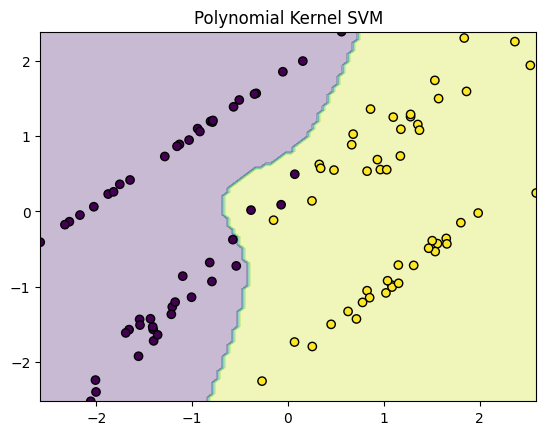

In [5]:
#24: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
model_poly = SVC(kernel='poly', degree=3)
model_poly.fit(X, y)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model_poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Polynomial Kernel SVM")
plt.show()

In [6]:
#25: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred))

GaussianNB Accuracy: 0.9736842105263158


In [7]:
#26: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
data = fetch_20newsgroups(subset='train', categories=categories)
model_text = make_pipeline(CountVectorizer(), MultinomialNB())
model_text.fit(data.data, data.target)
print("MultinomialNB trained successfully on text data.")

MultinomialNB trained successfully on text data.


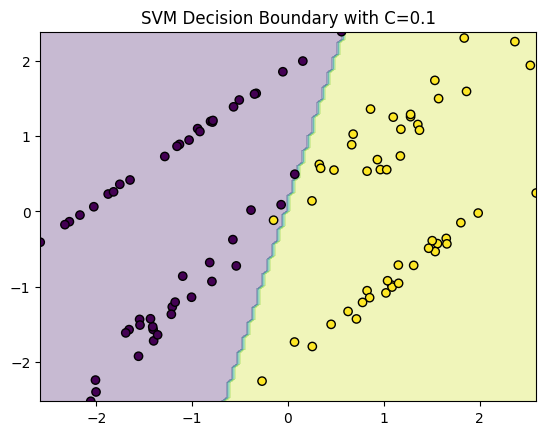

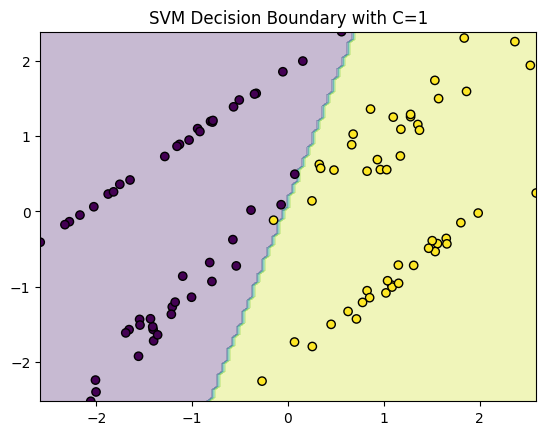

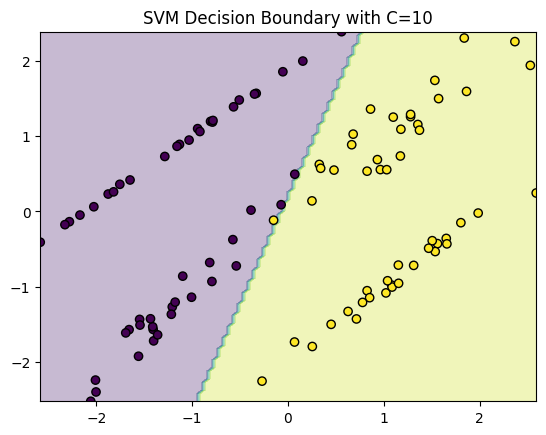

In [8]:
#27: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

for C in [0.1, 1, 10]:
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"SVM Decision Boundary with C={C}")
    plt.show()

In [7]:
#28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import Binarizer

# Load dataset and binarize features
cancer = load_breast_cancer()
binarizer = Binarizer()
X_binary = binarizer.fit_transform(cancer.data)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, cancer.target, test_size=0.2, random_state=42)

# Train BernoulliNB
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train_bin, y_train_bin)
y_pred_bin = model_bernoulli.predict(X_test_bin)

# Evaluate
acc_bernoulli = accuracy_score(y_test_bin, y_pred_bin)
print("BernoulliNB Accuracy (Binary Features):", acc_bernoulli)

BernoulliNB Accuracy (Binary Features): 0.6228070175438597


In [10]:
#29: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_scaled = SVC()
model_scaled.fit(X_train_s, y_train_s)
acc_scaled = accuracy_score(y_test_s, model_scaled.predict(X_test_s))

X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.2, random_state=42)
model_unscaled = SVC()
model_unscaled.fit(X_train_ns, y_train_ns)
acc_unscaled = accuracy_score(y_test_ns, model_unscaled.predict(X_test_ns))

print("Accuracy with Scaling:", acc_scaled)
print("Accuracy without Scaling:", acc_unscaled)

Accuracy with Scaling: 1.0
Accuracy without Scaling: 1.0


In [11]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Load text data
categories = ['sci.space', 'rec.sport.hockey']
data = fetch_20newsgroups(subset='train', categories=categories)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Without smoothing (alpha=0): risky, can lead to errors if unseen features exist
model_no_smooth = make_pipeline(CountVectorizer(), MultinomialNB(alpha=0))
model_no_smooth.fit(X_train, y_train)
acc_no_smooth = model_no_smooth.score(X_test, y_test)

# With Laplace smoothing (alpha=1, default)
model_smooth = make_pipeline(CountVectorizer(), MultinomialNB(alpha=1))
model_smooth.fit(X_train, y_train)
acc_smooth = model_smooth.score(X_test, y_test)

print("MultinomialNB Accuracy without smoothing (alpha=0):", acc_no_smooth)
print("MultinomialNB Accuracy with Laplace smoothing (alpha=1):", acc_smooth)

/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


MultinomialNB Accuracy without smoothing (alpha=0): 0.7405857740585774
MultinomialNB Accuracy with Laplace smoothing (alpha=1): 0.9874476987447699


In [8]:
#31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

from sklearn.model_selection import GridSearchCV

# Using breast cancer dataset for this example
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_grid, y_train_grid)

# Best model evaluation
y_pred_grid = grid.predict(X_test_grid)
acc_grid = accuracy_score(y_test_grid, y_pred_grid)

print("Best Parameters:", grid.best_params_)
print("Accuracy with Best Parameters:", acc_grid)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy with Best Parameters: 0.956140350877193


In [9]:
#32 Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification

# Create imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                                   n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

# Train without class weights
model_no_weights = SVC()
model_no_weights.fit(X_train_imb, y_train_imb)
acc_no_weights = accuracy_score(y_test_imb, model_no_weights.predict(X_test_imb))

# Train with class weighting
model_weighted = SVC(class_weight='balanced')
model_weighted.fit(X_train_imb, y_train_imb)
acc_weighted = accuracy_score(y_test_imb, model_weighted.predict(X_test_imb))

print("Accuracy without class weights:", acc_no_weights)
print("Accuracy with class weights:", acc_weighted)

Accuracy without class weights: 1.0
Accuracy with class weights: 0.98


In [16]:
#33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.


from sklearn.datasets import fetch_20newsgroups

spam_data = fetch_20newsgroups(subset='train', categories=['rec.sport.hockey', 'sci.space'])
model_spam = make_pipeline(CountVectorizer(), MultinomialNB())
model_spam.fit(spam_data.data, spam_data.target)
print("Naïve Bayes Spam Classifier trained on binary newsgroups")

Naïve Bayes Spam Classifier trained on binary newsgroups


In [17]:
#34 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

model_svm = SVC()
model_nb = GaussianNB()
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
model_svm.fit(X_train_c, y_train_c)
model_nb.fit(X_train_c, y_train_c)
acc_svm = accuracy_score(y_test_c, model_svm.predict(X_test_c))
acc_nb = accuracy_score(y_test_c, model_nb.predict(X_test_c))
print("SVM Accuracy:", acc_svm)
print("Naïve Bayes Accuracy:", acc_nb)

SVM Accuracy: 0.9473684210526315
Naïve Bayes Accuracy: 0.9736842105263158


In [6]:
#35 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Classifier without feature selection ----
clf_full = GaussianNB()
clf_full.fit(X_train_scaled, y_train)
y_pred_full = clf_full.predict(X_test_scaled)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy without feature selection: {accuracy_full:.4f}")

# ---- Feature Selection ----
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)

# Apply on original (non-standardized) data for chi2
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = feature_names[selector.get_support()]
print(f"Selected features: {selected_features}")

# Standardize selected features
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# ---- Classifier with feature selection ----
clf_selected = GaussianNB()
clf_selected.fit(X_train_selected_scaled, y_train)
y_pred_selected = clf_selected.predict(X_test_selected_scaled)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy with top {k} features: {accuracy_selected:.4f}")

Accuracy without feature selection: 0.9357
Selected features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']
Accuracy with top 10 features: 0.9532


In [7]:
#36 Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- One-vs-Rest (OvR) Strategy ---
ovr_model = OneVsRestClassifier(SVC(kernel='linear'))
ovr_model.fit(X_train_scaled, y_train)
ovr_preds = ovr_model.predict(X_test_scaled)
ovr_accuracy = accuracy_score(y_test, ovr_preds)
print(f"Accuracy (One-vs-Rest): {ovr_accuracy:.4f}")

# --- One-vs-One (OvO) Strategy ---
ovo_model = OneVsOneClassifier(SVC(kernel='linear'))
ovo_model.fit(X_train_scaled, y_train)
ovo_preds = ovo_model.predict(X_test_scaled)
ovo_accuracy = accuracy_score(y_test, ovo_preds)
print(f"Accuracy (One-vs-One): {ovo_accuracy:.4f}")

Accuracy (One-vs-Rest): 0.9815
Accuracy (One-vs-One): 0.9815


In [8]:
#37 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define kernels to compare
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # For polynomial kernel, specify degree (default is 3)
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        model = SVC(kernel=kernel, random_state=42)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")

Accuracy with linear kernel: 0.9766
Accuracy with poly kernel: 0.8947
Accuracy with rbf kernel: 0.9766


In [9]:
#38 Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Define the SVM model (using RBF kernel here, but you can change)
svm_model = SVC(kernel='rbf', random_state=42)

# Create Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use a pipeline to scale features before training (important for SVM)
pipeline = make_pipeline(StandardScaler(), svm_model)

# Perform cross-validation and get accuracy scores for each fold
scores = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

# Print accuracy for each fold and average accuracy
print("Accuracy for each fold:", scores)
print(f"Average accuracy: {np.mean(scores):.4f}")

Accuracy for each fold: [0.99122807 0.94736842 0.97368421 0.99122807 0.98230088]
Average accuracy: 0.9772


In [10]:
#39 Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (good practice, although not mandatory for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define different prior probabilities to test
# priors correspond to the classes [0, 1] in order
priors_list = [
    None,                # Use default priors (based on training data)
    [0.5, 0.5],          # Equal class priors
    [0.7, 0.3],          # Favor class 0
    [0.3, 0.7]           # Favor class 1
]

for priors in priors_list:
    if priors is None:
        print("Using default priors (from training data)")
    else:
        print(f"Using custom priors: {priors}")

    clf = GaussianNB(priors=priors)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

Using default priors (from training data)
Accuracy: 0.9357

Using custom priors: [0.5, 0.5]
Accuracy: 0.9357

Using custom priors: [0.7, 0.3]
Accuracy: 0.9357

Using custom priors: [0.3, 0.7]
Accuracy: 0.9298



In [11]:
#40 Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM without feature selection
svm_full = SVC(kernel='linear', random_state=42)
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)
acc_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy without RFE: {acc_full:.4f}")

# Perform RFE to select top features (e.g., 10)
n_features_to_select = 10
rfe = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=n_features_to_select)
rfe.fit(X_train_scaled, y_train)

# Transform training and test sets
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Train SVM on selected features
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy with RFE (top {n_features_to_select} features): {acc_rfe:.4f}")

Accuracy without RFE: 0.9766
Accuracy with RFE (top 10 features): 0.9649


In [12]:
#41 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict test set
y_pred = svm.predict(X_test_scaled)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.9815
Recall:    0.9815
F1-Score:  0.9815

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [13]:
#42 Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predict probabilities for the test set
y_prob = nb.predict_proba(X_test_scaled)

# Calculate Log Loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.4545


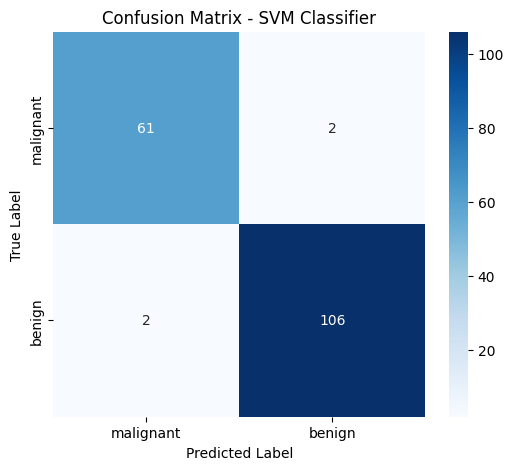

In [14]:
#43 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = svm.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

In [16]:
#44 Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVR model with RBF kernel
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.3972


In [17]:
#45 Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (recommended for better performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predict probability estimates for the positive class
y_prob = nb.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9927


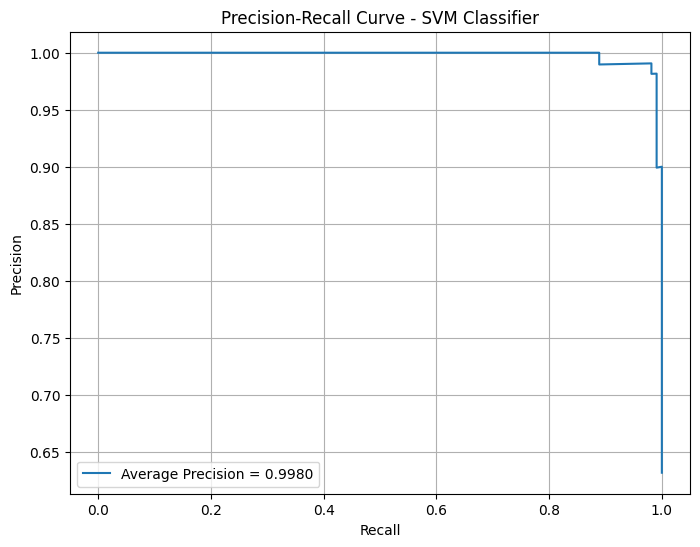

In [18]:
#46 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with probability estimates enabled
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_scores = svm.predict_proba(X_test_scaled)[:, 1]

# Calculate precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM Classifier')
plt.legend()
plt.grid(True)
plt.show()